### Home work 'churn'

#### Цель заказчика: 
##### банк хочет разработать кампанию лояльности по удержанию клиентов, 
##### но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов:
#####  нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, 
##### определяющие клиентов.
##### После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента.

In [ ]:
#### Задачи DS:
##### подготовить мини-отчёт:
##### Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов

In [28]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
import matplotlib.pyplot as plt
# % matplotlib inline
# plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px
import numpy as np

#### ЗАДАНИЯ

##### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

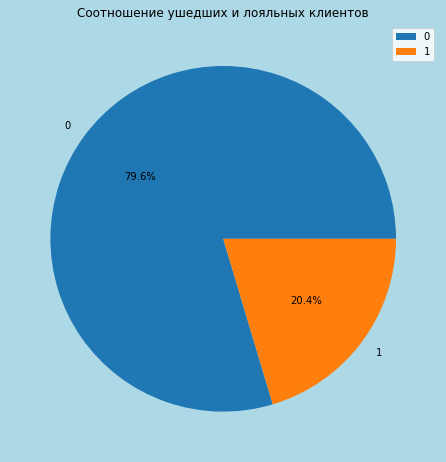

In [21]:
##### working with column: Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
fig = plt.figure(facecolor='lightblue', figsize = (12,6))
axes = fig.add_axes([0, 0, 1, 1])

churn_df = churn_data['Exited'].value_counts()

axes.pie(
    churn_df,
    labels = churn_df.index,
    autopct = '%.1f%%',
    
 );
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=12)
axes.legend();

In [ ]:
##### комментарий:
##### из данной круговой диаграммы мы наблюдаем, что соотношение ушедших клиентов составило 20.4% 
##### и лояльных клиентов - 79,6% 
##### наблюдение говорит о том, что клиенты банка в преимущественном проценте относятся к категории "лояльным"
##### Однако 20,4% могут быть обозначены, как "потери"  в связи с уходом клиентов

##### 9.2. Постройте график, показывающий распределение баланса пользователей,  у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы

In [25]:
#### working with column: Balance — баланс на счетах клиента в банке

In [45]:
# making filter with 'mask'
mask = churn_data['Balance']>2500
display(churn_data[mask])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


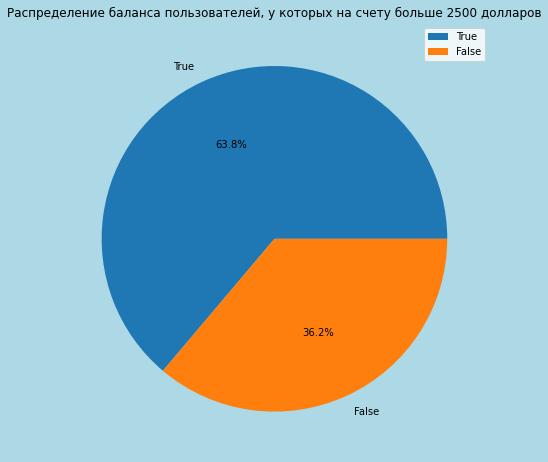

In [46]:
# строим график
#plt.style.use('default')
balace_25 = mask.value_counts() # переменная для новой DF
fig = plt.figure(facecolor='lightblue', figsize = (12,6))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    balace_25,
    labels = balace_25.index,
    autopct = '%.1f%%',
    
);
axes.set_title('Распределение баланса пользователей, у которых на счету больше 2500 долларов', fontsize=12)
axes.legend();

In [ ]:
##### комментарий:
##### из данной круговой диаграммы мы наблюдаем, что соотношение клиентов, у которых на счету больше 2500 долларов,
# составило 63,8% 
##### доля клиентов с меньшими вкладами составила 36,2 % 
##### наблюдение говорит о том, что у большинства клиентов банка сумма на счёте составляет больше $2500

##### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [68]:
# изучаем распределение баланса клиента в разрезе признака оттока (1 — ушедший клиент, 0 — лояльный клиент))
clients_balance_diff = churn_data.groupby(by = ['Exited'])['Balance'].sum()
print(clients)

Exited
0    5.792708e+08
1    1.855881e+08
Name: Balance, dtype: float64


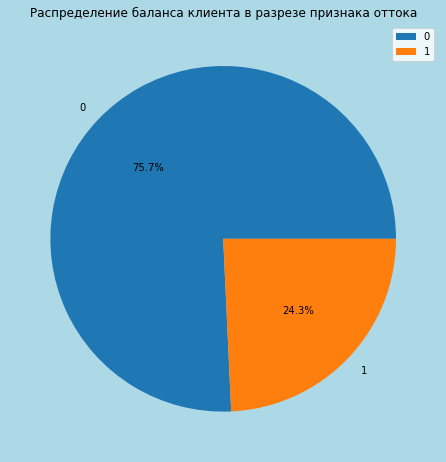

In [71]:
# строим график
#plt.style.use('default')
clients_balance_diff = churn_data.groupby(by = ['Exited'])['Balance'].sum()
fig = plt.figure(facecolor='lightblue', figsize = (12,6))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    clients_balance_diff,
    labels = clients_balance_diff.index,
    autopct = '%.1f%%',
    
);
axes.set_title('Распределение баланса клиента в разрезе признака оттока', fontsize=12) 
# (1 — ушедший клиент, 0 — лояльный клиент)
axes.legend();

In [ ]:
##### комментарий:
##### из данной круговой диаграммы мы наблюдаем, что 75,7% - это баланс лояльных клиентов
##### а 24,3% составляет баланс ушедших клиентов
##### наблюдение говорит о том, что требуются дополнительные меры по изучению причин оттока клиентов

In [150]:
# различаются суммы на накопительном счёте ушедших и лояльных клиентов
balance_diff = churn_data.groupby(by = ['Exited'])['Balance'].last()
print(balance_diff)

Exited
0    130142.79
1     75075.31
Name: Balance, dtype: float64


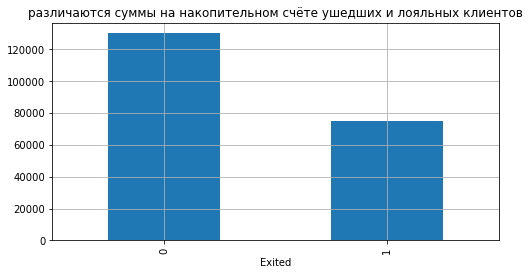

In [151]:
balance_diff.plot(
    kind = 'bar',
    figsize = (8, 4),
    title = 'различаются суммы на накопительном счёте ушедших и лояльных клиентов',
    grid = True,
     
);

In [ ]:
##### комментарий:
##### с чем это может быть связано, что может не устраивать ушедших клиентов в банке?
##### вероятно, с условиями оплаты за обслуживание карт за месяц,
##### или высокой комиссии при переводе денежных средств на карту другого банка и т.п.
##### или невыгодные условия по вскладам и chashback

##### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [171]:
age_vs_left = churn_data.groupby(by = 'Age')['Exited'].sum()

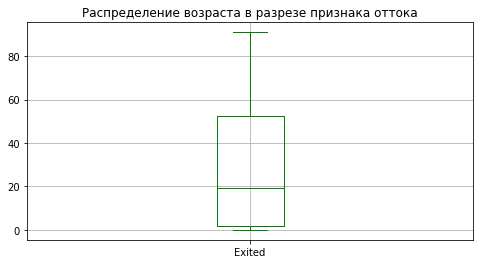

In [172]:
age_vs_left.plot(
    kind = 'box',
    figsize = (8, 4),
    title = 'Распределение возраста в разрезе признака оттока',
    grid = True,
    color = 'green',   
);

In [ ]:
##### комментарий:
##### На какую возрастную категорию клиентов стоит обратить внимание банку?
##### на клиентов до 20 лет
##### В какой группе больше потенциальных выбросов
##### от 0 до 5 лет

##### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

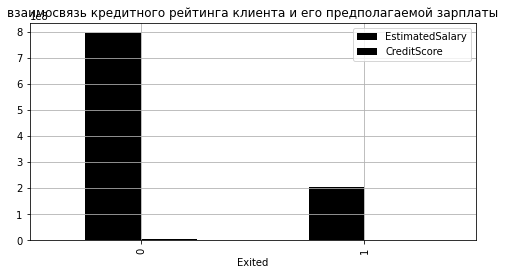

In [189]:
credit_vs_salary = churn_data.groupby(by = ['Exited'])[['EstimatedSalary', 'CreditScore']].sum()
credit_vs_salary.plot(
    kind = 'bar',
    figsize = (8, 4),
    title = 'взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты',
    grid = True,
    color = 'black'
);

##### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это

In [197]:
male_vs_female = churn_data.groupby(by = ['Gender'])['Exited'].sum()
print(male_vs_female)

Gender
Female    1139
Male       898
Name: Exited, dtype: int64


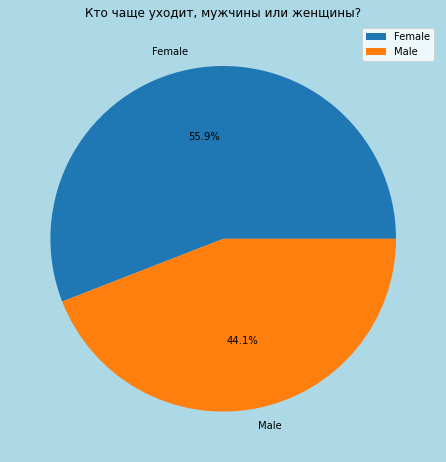

In [201]:
male_vs_female = churn_data.groupby(by = ['Gender'])['Exited'].sum()

fig = plt.figure(facecolor='lightblue', figsize = (12,6))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    male_vs_female,
    labels = male_vs_female.index,
    autopct = '%.1f%%',
    
);
axes.set_title('Кто чаще уходит, мужчины или женщины?', fontsize=12) 
axes.legend();

In [ ]:
##### комментарий:
##### % дам больше, чем % джентельменов, покидающих банк

##### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

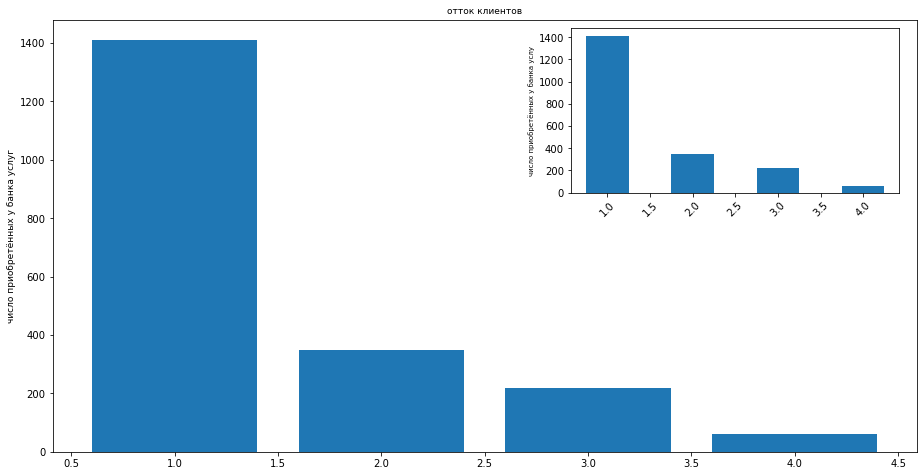

In [209]:
num_of_products = churn_data.groupby(by = ['NumOfProducts'])['Exited'].sum()
#визуализация главного графика
fig = plt.figure(figsize=(12, 6))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = num_of_products.index, height = num_of_products);
main_axes.set_ylabel('число приобретённых у банка услуг', fontsize=9)
main_axes.set_title('отток клиентов', fontsize=9)

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = num_of_products.index, height = num_of_products, width=0.5);
insert_axes.set_ylabel('число приобретённых у банка услу', fontsize=7)
insert_axes.xaxis.set_tick_params(rotation=45)